In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from utils import *
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [43]:
estimate = pd.read_csv("csv/Estimar_UH2020.txt", sep = "|")
data = pd.read_csv("csv/Modelar_UH2020.txt", sep = "|")
total = pd.concat([data,estimate])

In [3]:
data.head(10)

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,...,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE
0,35984B9C3E7CD9A1,2207357872,165920300,0.000000e+00,443.001300,616.001697,746.998401,872.996472,1009.000946,1159.002319,...,10951.926645,144.426900,0.557237,0.067249,0.057372,0.853127,2002,0.0,2,RESIDENTIAL
1,F9D04BF6D037F8FB,2189757160,165463267,5.879611e-05,443.899011,627.999060,770.001611,904.999988,1032.998474,1165.001636,...,7048.367637,38.342550,0.709884,0.125156,0.147929,1.181953,1949,1.0,8,RESIDENTIAL
2,B89D5711AFF8C423,2240147335,165690752,0.000000e+00,353.502274,523.003601,644.001831,760.997131,876.999634,1006.997498,...,7013.073271,108.794384,0.517702,0.058268,0.081666,1.401552,1986,1.0,5,RESIDENTIAL
3,1C3478AC1522E7E4,2227146459,165934099,0.000000e+00,268.000613,376.999609,478.003784,575.001233,683.997742,809.005994,...,6216.880538,155.224455,0.450871,0.053591,0.054201,1.011382,1999,1.0,2,RESIDENTIAL
4,4D12AA5009064345,2212350459,165681791,0.000000e+00,318.997910,492.003845,632.999634,757.002197,882.999908,1019.008911,...,7092.767616,1789.873366,0.458819,0.012858,0.019936,1.550478,1966,8.0,6,RESIDENTIAL
5,3E74975BD3F67ADE,2203466180,165762700,0.000000e+00,343.996613,567.010620,745.995483,900.997925,1051.995361,1200.006226,...,8827.104856,104.511247,0.466688,0.070373,0.063454,0.901678,1992,4.0,5,RESIDENTIAL
6,200CB7A318D959DA,2141448290,165496766,0.000000e+00,274.999353,416.001074,561.002997,706.001086,862.001343,1040.000391,...,7285.159019,373.432985,0.251622,0.029647,0.022728,0.766600,1982,1.0,4,RESIDENTIAL
7,80E74C603F31D41C,2212938608,165575238,1.308316e-10,405.999329,561.998108,694.002716,832.001648,969.999817,1115.003906,...,8126.684713,489.776545,0.349491,0.025246,0.028265,1.119589,1952,7.0,4,RESIDENTIAL
8,2FC79F1B7379EC1F,2160794349,165672907,3.997917e-05,396.000687,530.996887,637.001221,735.997009,834.503479,946.001526,...,7122.145471,116.391550,0.523862,0.063012,0.071429,1.133571,1970,1.0,4,RESIDENTIAL
9,A4A6D078FB1079E5,2267210836,165899063,1.098887e-03,454.999338,573.005005,668.002612,752.999573,853.000122,1005.999158,...,5997.459077,333.617230,0.860099,0.046252,0.055740,1.205122,1990,1.0,6,INDUSTRIAL


<BarContainer object of 7 artists>

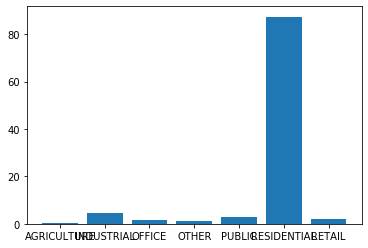

In [4]:
# Distribucion de las clases en los datos
d = data[["X","CLASE"]].groupby("CLASE").count()
class_percentage = d/d["X"].sum()*100
plt.bar(d.index, class_percentage["X"])

In [6]:
X = data.drop(['CLASE', 'ID'], axis=1)
y = pd.DataFrame(data['CLASE'])
y.CLASE = pd.Categorical(y.CLASE)
y['code'] = y.CLASE.cat.codes
y = y.drop(['CLASE'], axis=1)

In [7]:
replacement  = {"A": 12, "B" : 11, "C" : 10, "1": 9, "2" : 8, "3" : 7, "4" : 6, "5" : 5,"6" : 4,"7" : 3,"8" : 2,"9" : 1}
X.CADASTRALQUALITYID =  X.CADASTRALQUALITYID.replace(replacement)

In [54]:

nans = data[data.isna().any(axis = 1)].index
data = data.drop(nans)

In [9]:
#Removing row with any NaN value
#print(len(np.where(np.isnan(X))[0]))
repeated = np.where(np.isnan(X))[0]
print(repeated)
repeated = list(dict.fromkeys(repeated))
print(repeated)
X = X.drop(repeated, axis=0)
y = y.drop(repeated, axis=0)
print('Number values X: ' + str(len(X)))
print('Number values y: ' + str(len(y)))


[  9864   9864  10145  10145  12273  12273  13089  13089  16330  16330
  23184  23184  34988  34988  38537  38537  43448  43448  48059  48059
  55054  55054  57998  57998  61724  61724  67773  67773  69253  69253
  71932  71932  76837  76837  78351  78351  78891  78891 102247 102247]
[9864, 10145, 12273, 13089, 16330, 23184, 34988, 38537, 43448, 48059, 55054, 57998, 61724, 67773, 69253, 71932, 76837, 78351, 78891, 102247]
Number values X: 103210
Number values y: 103210


In [79]:
def data_augmentation_SMOTE(data):
    replacement  = {"A": 12, "B" : 11, "C" : 10, "1": 9, "2" : 8, "3" : 7, "4" : 6, "5" : 5,"6" : 4,"7" : 3,"8" : 2,"9" : 1}
    #data.CADASTRALQUALITYID =  data.CADASTRALQUALITYID.replace(replacement)
    
    X = data.drop(['CLASE', 'ID'], axis=1)
    y = data['CLASE']
    cats = pd.Categorical(y)
    X_augmented, y_augmented = oversample.fit_resample(X, cats)
    print('Number values X after SMOTE: ' + str(len(X_augmented)))
    print('Number values y after SMOTE: ' + str(len(y_augmented)))
    X_augmented["CLASE"] = y_augmented
    return X_augmented

In [81]:
augmented = data_augmentation_SMOTE(data)

Number values X after SMOTE: 631211
Number values y after SMOTE: 631211


In [57]:
X, y = oversample.fit_resample(X, y)
print('Number values X after SMOTE: ' + str(len(X)))
print('Number values y after SMOTE: ' + str(len(y)))

Number values X after SMOTE: 631211
Number values y after SMOTE: 631211


In [11]:
dataSmote = X
dataSmote['CLASE'] = y

In [60]:
pd.Categorical(data.CLASE)

[RESIDENTIAL, RESIDENTIAL, RESIDENTIAL, RESIDENTIAL, RESIDENTIAL, ..., RESIDENTIAL, RESIDENTIAL, INDUSTRIAL, RESIDENTIAL, RESIDENTIAL]
Length: 103210
Categories (7, object): [AGRICULTURE, INDUSTRIAL, OFFICE, OTHER, PUBLIC, RESIDENTIAL, RETAIL]

<BarContainer object of 7 artists>

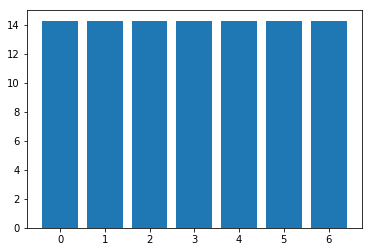

In [12]:
# Distribucion de las clases en los datos
d = dataSmote[["X","CLASE"]].groupby("CLASE").count()
class_percentage = d/d["X"].sum()*100
plt.bar(d.index, class_percentage["X"])

In [13]:
dataSmote.to_csv('csv/smote.csv')